# Analysis of Normal Modes for a Coupled Three-Pendulum System
This notebook calculates and visualizes the normal modes of a coupled three-pendulum system. 
The system's physical parameters are defined, followed by the construction of the system matrix. 
Eigenvalue analysis is then performed to determine the normal mode frequencies and their corresponding mode shapes (eigenvectors).

## System Parameters and Matrix Formulation
The following code cell defines the physical parameters of the coupled pendulum system. These include spring constants, lengths, masses, moments of inertia, and the gravitational acceleration.
Based on these parameters, the system matrix `A` is constructed. The dynamics of the system can be described by the equation `\ddot{\vec{\theta}} = A \vec{	heta}`, where `\vec{\theta}` is the vector of angular displacements of the pendulums. 
The eigenvalues `\lambda` of matrix `A` are related to the normal mode angular frequencies `\omega` by `\lambda = -\omega^2`. The eigenvectors of `A` represent the normal mode shapes, indicating the relative amplitudes of motion for each pendulum in that specific mode.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Physical Constants and Parameters (from sim.py)
# These were previously in the __main__ section or as example values
g_const = 9.81  # m/s^2
k1_val = 3.32   # N/m oder N/rad, je nach Definition von cl
k2_val = 3.04   # N/m oder N/rad
cl_val = 0.046 * 6    # m
dl_val = 0.046 * 6    # m
y_cm1_val = 0.142 # m (angenommen positiv, wenn der Schwerpunkt eine rückstellende Kraft erzeugt)
y_cm2_val = 0.28 # m (kann auch negativ sein, was die Natur des g-Terms ändert)
y_cm3_val = 0.14 # m
m1_val = 0.6008    # kg
m2_val = 1.2163    # kg
m3_val = 0.6018    # kg
I1_val = m1_val * (0.28) ** 2 / 3.0    # kg*m^2
I2_val = m2_val * (0.56) ** 2 / 3.0   # kg*m^2
I3_val = m3_val * (0.28) ** 2 / 3.0   # kg*m^2

# Define the elements of the matrix A (adapted from sim.py)
# The equations are in the form \ddot{theta} = A * theta
# The eigenvalues of A are -omega^2

# Original matrix element calculations from sim.py function:
A11 = -((cl_val**2 * k1_val) + (y_cm1_val * m1_val * g_const)) / I1_val
A12 = (k1_val * cl_val**2) / I1_val
A13 = 0.0

A21 = (k1_val * cl_val**2) / I2_val
A22 = -((k2_val * dl_val**2) + (k1_val * cl_val**2) + (y_cm2_val * m2_val * g_const)) / I2_val
A23 = (k2_val * dl_val**2) / I2_val

A31 = 0.0
A32 = (k2_val * dl_val**2) / I3_val
A33 = -((k2_val * dl_val**2) + (y_cm3_val * m3_val * g_const)) / I3_val

# Create the matrix A
A_matrix = np.array([
    [A11, A12, A13],
    [A21, A22, A23],
    [A31, A32, A33]
])

print("Systemmatrix A:")
print(A_matrix)

# Calculate eigenvalues and eigenvectors of A
# eigenvalues_A correspond to -omega^2
# eigenvectors_A are the normal mode vectors (columns of the matrix)
eigenvalues_A, eigenvectors_A = np.linalg.eig(A_matrix)

print("\nEigenvalues of A (lambda = -omega^2):")
print(eigenvalues_A)
print("\nEigenvectors of A (columns are mode vectors):")
print(eigenvectors_A)

# Calculate omega^2 = -lambda
omega_squared_values = -eigenvalues_A

# Ensure omega^2 are not negative before taking sqrt
# Handle potential small negative numbers due to numerics by taking max(0, val)
angular_frequencies_rad_s = np.sqrt(np.maximum(0, omega_squared_values.astype(complex))).real

print("\nAngular frequencies (omega in rad/s):")
print(angular_frequencies_rad_s)

# Convert angular frequencies to frequencies in Hz
# f = omega / (2 * pi)
normal_mode_frequencies_hz = angular_frequencies_rad_s / (2 * np.pi)

print("\nNormal Mode Frequencies (f in Hz):")
print(normal_mode_frequencies_hz)

# Store eigenvectors for plotting (already in eigenvectors_A)
# Each column in eigenvectors_A is an eigenvector
normal_mode_vectors = eigenvectors_A

print("\nNormal Mode Vectors (Eigenvectors):")
for i in range(normal_mode_vectors.shape[1]):
    print(f"Mode {i+1}: {normal_mode_vectors[:, i]}")

Systemmatrix A:
[[-69.41196194  16.10762521   0.        ]
 [  1.98911889 -30.08726648   1.82136188]
 [  0.          14.7246424  -67.27821383]]

Eigenvalues of A (lambda = -omega^2):
[-28.60850173 -70.41965848 -67.74928204]

Eigenvectors of A (columns are mode vectors):
[[-0.3461181   0.95787037 -0.29589859]
 [-0.87677829 -0.05992458 -0.03054359]
 [-0.3338594   0.28087969  0.95473091]]

Angular frequencies (omega in rad/s):
[5.34869159 8.39164218 8.2309952 ]

Normal Mode Frequencies (f in Hz):
[0.85127071 1.33557133 1.31000357]

Normal Mode Vectors (Eigenvectors):
Mode 1: [-0.3461181  -0.87677829 -0.3338594 ]
Mode 2: [ 0.95787037 -0.05992458  0.28087969]
Mode 3: [-0.29589859 -0.03054359  0.95473091]


## Calculated Frequencies and Mode Vectors
The code cell above calculates and prints the system matrix `A`, its eigenvalues (`-omega^2`), the derived angular frequencies (`omega` in rad/s), the normal mode frequencies (in Hz), and the corresponding normal mode vectors (eigenvectors). 
Each eigenvector (column in the 'Normal Mode Vectors' output) shows the relative displacement of the three pendulums for that mode.

## Normal Mode Visualization
The following plots visualize the normal modes (eigenvectors) of the system. 
Each plot corresponds to one normal mode, displaying the relative amplitudes of oscillation for the three pendulums. 
The title of each plot indicates the mode number and its calculated frequency in Hz.

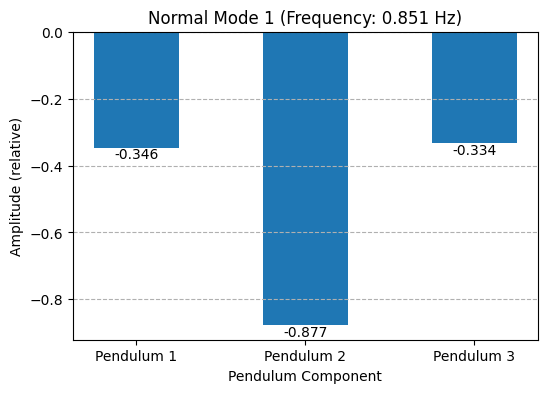

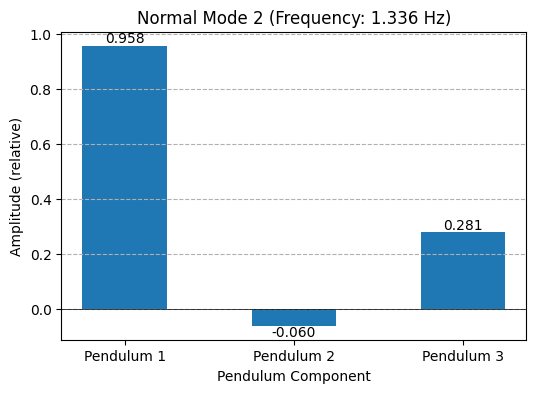

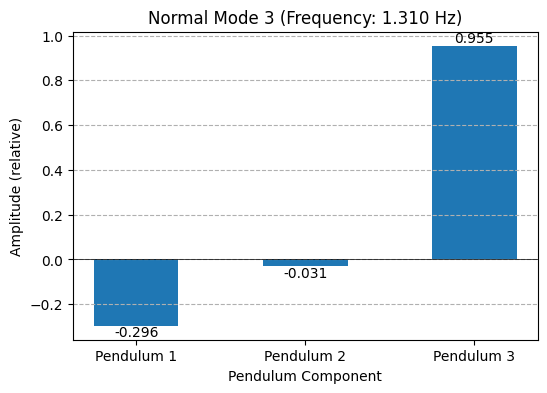

In [2]:
# Plotting the Normal Modes

# Ensure normal_mode_frequencies_hz and normal_mode_vectors are available from previous cell execution
num_modes = normal_mode_vectors.shape[1]
pendulum_indices = np.arange(1, normal_mode_vectors.shape[0] + 1)  # Should be 1, 2, 3

for i in range(num_modes):
    mode_vector = normal_mode_vectors[:, i] # Get i-th column
    frequency_hz = normal_mode_frequencies_hz[i]
    
    plt.figure(figsize=(6, 4))
    # Create a bar plot for the mode shape. Using bar makes it clear these are distinct components.
    # Alternatively, one could use plt.plot(pendulum_indices, mode_vector, 'o', markersize=10) for dots
    bars = plt.bar(pendulum_indices, mode_vector, width=0.5, tick_label=['Pendulum 1', 'Pendulum 2', 'Pendulum 3'])
    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom' if yval >=0 else 'top', ha='center')
        
    plt.xlabel("Pendulum Component")
    plt.ylabel("Amplitude (relative)")
    plt.title(f"Normal Mode {i+1} (Frequency: {frequency_hz:.3f} Hz)")
    plt.axhline(0, color='black', linewidth=0.5) # Add a zero line for reference
    plt.grid(axis='y', linestyle='--')
    plt.xticks(pendulum_indices, ['Pendulum 1', 'Pendulum 2', 'Pendulum 3']) # Ensure x-ticks are correctly labeled
    plt.show()
